# Práctica 3 - Algoritmos Genéticos
### Grupo 1463 - Pareja 10

### Pablo Marcos Manchón y Dionisio Pérez Alvear
----------------------------------------------------------

## Apartado 1 - Detalles Implementación


Para la implementación del algoritmo genético hemos creado la clase **`ClasificadorAG`** que implementa a la clase
clasificador, la cual se encarga de realizar el entrenamiento mediante el algoritmo evolutivo y la clasificación
una vez realizado el entrenamiento.

Para la representación de los cromosomas hemos creado la clase **`Representacion`** la cual se encarga de la transformación de la matriz de datos a una representación adecuada antes del entrenamiento, para poder evaluar las reglas de forma rápida, de la representación de las reglas de los cromosomas y la predicción de los datos a partir de sus reglas.

En el caso de **`RepresentacionEntera`** cada valor de un atributo es codificado mediante el número de intervalo al que pertenece y cada regla contiene un número de intervalo.

La **`RepresentacionBinaria`** codifica los datos a nivel de bit para que las reglas no tengan que
limitarse a un único intervalo.

Gracias al prepocesado de los datos realizado antes del entrenamiento hemos conseguido reducir bastante el tiempo
necesario para entrenar en comparación con el tiempo necesario en caso de no codificar los datos, pudiendo realizar
en pocos segundos el entrenamiento de **wdbc** con más de 1000 generaciones.



**a) Inicialización de la población** 

Se inicializa la población de forma aleatoria, pero solo un porcentaje de las reglas de los cromosomas es inicializada  a un valor distinto de cero, caso en el que la regla es ignorada, para esto el clasificador a la hora de realizar el entrenamiento
recibe el parámetro **`umbral`**, que especifica este porcentaje. Todos los cromosomas se inicializan al menos con
una regla distinta de cero aunque el umbral sea inferior.
Para el dataset **`wdbc`** utilizamos un umbral de alrededor el 10% de los datos, de forma que se inicializan 2 o 3 reglas con un valor distinto de cero, tanto para la representación binaria como entera.

**b) Mecanismo de cruce**

Para realizar el cruce en el algoritmo genético hemos utilizado cruce en un punto, además la probabilidad de
cruce puede ser modificada mediante el parámetro **`pc`** de la función de entrenamiento del clasificador.
Hemos observado buenos resultados en la clasificación de **`wdbc`** con una probabilidad de cruce de alrededor de 0.7.

**c) Mecanismo de mutación implementado**

El mecanismo de mutación dependerá de la representación utilizada, pero en ambos casos la probabilidad de mutación
puede ser modificada mediante el parámetro **`pm`** del entrenamiento. las reglas tendrán una probabilidad de
mutación igual a  **pm/(número de reglas)**.

En el caso de la representación entera cuando una regla muta su valor es sustituido por uno generado aleatoriamente
y en el caso de la representación binaria uno de los bits de la regla es invertido.

** Otros parámetros **

El algoritmo evolutido puede configurarse para realizar elitismo o no mediante el parámetro **`elitismo`**. En el 
caso de realizar elitismo los dos mejores padres pasan a la siguiente generación y los dos peores hijos son descartados. 

Debido a que no siempre realizamos elitismo y aunque lo realizamos los padres pueden mutar en las sucesivas generaciones el cromosoma elegido no es el mejor de la última generación, sino que guardamos el mejor individuo de
entre todas las generaciones.

Hemos observado que en **`wdbc`** obtenemos mejores resultados maximizando la tasa de error en lugar de maximizar la tasa de acierto, obteniendo una tasa de error de un 90% para la representación entera, y a la hora de clasificar si 
invertimos la predicción conseguimos que nuestro clasificador obtenga una tasa de acierto del 90%. Esta opción
puede ser modificada mediante el parámetro **`invertir`** de la función entrenamiento.

Además hemos añadido un segundo criterio de parada, que puede ser activado opcionalmente al entrenar, en el cual se puede especificar un número máximo de poblaciones sin que mejore el fitness del mejor individuo.

Para imprimir durante el entrenamiento el número de generación en la que se encuentra hemos creado el parámetro
**verbose**, por defecto a False.

## Apartado 2 - Entrenamiento



In [1]:
from Datos import Datos
from ClasificadorAG import ClasificadorAG, RepresentacionEntera, RepresentacionBinaria
from AnalisisRoc import matriz_confusion
from plotModel import plotModel
from EstrategiaParticionado import *
import matplotlib.pyplot as plt
import numpy as np
from Clasificador import Clasificador


# Cargamos los conjuntos de datos
wdbc = Datos('../ConjuntosDatos/wdbc.data')
example2 = Datos('../ConjuntosDatos/example2.data')
example4 = Datos('../ConjuntosDatos/example4.data')

# Particion para realizar validacion
validacion = ValidacionSimple()

En primer lugar probaremos el caso más sencillo de todos, **example4**, en el cual deberiamos obtener una tasa de acierto de el 100%.

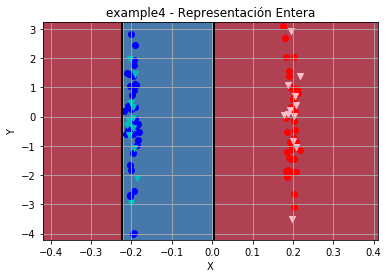

Porcentaje de acierto en example4:  100.0 %


In [140]:
# Creamos el clasificador
clf = ClasificadorAG(representacion=RepresentacionEntera, n_intervalos=2)

# Creamos particion para la validación
particion = validacion(example4)[0]
idx_test = particion.indicesTest
idx_train = particion.indicesTrain

clf.entrenamiento(example4, indices=idx_train, tam_poblacion=100, n_generaciones=10, umbral=.1, pc=.7, pm=.1)
                  
plotModel(example4[idx_train,0], example4[idx_train,1], example4[idx_train,-1], clf, 
          "example4 - Representación Entera", example4.diccionarios)

# Dibujamos los datos de test con un triangulo
x = example4[idx_test,0]
y = example4[idx_test,1]
clase = example4[idx_test,-1]
plt.scatter(x[clase==0], y[clase==0], c='pink', marker="v")
plt.scatter(x[clase==1], y[clase==1], c='c', marker="v")
plt.show()

# Porcentaje de acierto para la validacion simple
pred = clf.clasifica(example4[particion.indicesTest])
print("Porcentaje de acierto en example4: ", 100* np.sum(pred == clase) / len(pred), "%")

### Examples 1-3
En los ejemplos 1-3, debido a la geometría en forma de cruz de los datasets y que nuestro clasificador solo puede
obtener regiones de clasificación (en el caso de la representación binaria) de la forma 
(I1 U I2 U ... U In) x (I1' U I2' U ... U In') obtenemos unos porcentaje de clasificación bastante bajo, de 
alrededor del 75% utilizando validación simple, sería necesario obtener un tipo de regla que admitiera una región más general para la obtención de un mejor clasificador en estos casos.

A continuación se muestra el resultado del entrenamiento para el ejemplo2.
Debido a que se trata del problema xor el cromosoma ganador es el resultante de elegir una de las esquinas como 
frontera de decisión, pudiendo clasificar de está forma 3/

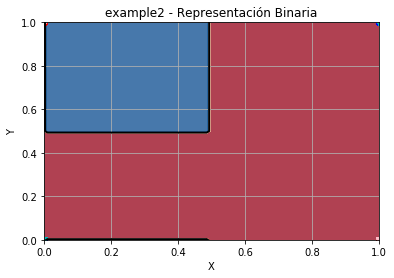

Porcentaje de acierto en example2:  76.0 %


In [56]:
# Creamos el clasificador

example = example2
clf = ClasificadorAG(representacion=RepresentacionBinaria, n_intervalos=2)

# Creamos particion para la validación
particion = validacion(example2)[0]
idx_test = particion.indicesTest
idx_train = particion.indicesTrain

clf.entrenamiento(example2, indices=idx_train, tam_poblacion=100, n_generaciones=100, umbral=.7, pc=.7, pm=.2)


plotModel(example2[idx_train,0], example2[idx_train,1], example2[idx_train,-1], clf, 
          "example2 - Representación Binaria", example.diccionarios)

# Dibujamos los datos de test con un triangulo
x = example[idx_test,0]
y = example[idx_test,1]
clase = example[idx_test,-1]
plt.scatter(x[clase==0], y[clase==0], c='pink', marker="v")
plt.scatter(x[clase==1], y[clase==1], c='c', marker="v")
plt.ylim(0,1)
plt.xlim(0,1)
plt.show()

# Porcentaje de acierto para la validacion simple
pred = clf.clasifica(example2[particion.indicesTest])
print("Porcentaje de acierto en example2: ", 100* np.sum(pred == clase) / len(pred), "%")

## WDBC

A continuación se muestran los resultados de clasificación para wdbc con los tamaños de población y número de
generaciones indicados en el enunciado.

En primer lugar estudiaremos los resultados obtenidos para la representación entera.
Utilizaremos una probabilidad de mutación de 0.1 y una probabilidad de cruce de 0.7, además no realizaremos 
elitismo. Utilizaremos una subdivisión en 2 intervalos para la representación entera y 4 para la binaria.

Estos valores con los que estamos realizando el entrenamiento fueron obtenidos mediante validación cruzada,
aunque no se incluye en el notebook la ejecución correspondiente debido a la gran cantidad de parámetros
a optimizar y se tardó bastante en obtener estos valores.

* Representación entera


In [8]:
clf = ClasificadorAG(representacion=RepresentacionEntera, n_intervalos=2)

acierto = np.empty((3,2))

generaciones = [100, 500, 1000]
poblaciones = [100, 200]



# Guardamos la tasa de acierto
for i, generacion in enumerate(generaciones):
    for j, poblacion in enumerate(poblaciones):
        
        acierto[i,j] = 1 - Clasificador.validacion(validacion, wdbc, clf, seed=1, tam_poblacion=poblacion,
                                        n_generaciones=generacion, umbral=.1, pc=.7, pm=.1, 
                                        elitismo=False, invertir=True, verbose=True)[0]
       
        
# La posicion (i,j) correponde a la generacion i, tamaño de poblacion j
print(acierto)

[[0.91608392 0.96503497]
 [0.95104895 0.90909091]
 [0.90909091 0.93706294]]


Hemos obtenido un porcentaje de acierto del 96%, vamos a ver la forma de uno de los cromosomas ganadores.

In [21]:
clf = ClasificadorAG(representacion=RepresentacionEntera, n_intervalos=2)
clf.entrenamiento(wdbc, tam_poblacion=100, n_generaciones=500, umbral=.1, pc=.7, pm=.1, invertir=True)

print("Fitness: ", clf.champion_fitness)
print(clf.champion)

Fitness:  0.9314586994727592
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]


Vemos como tan solo 3 reglas están activas y a pesar de ello se consigue un porcentaje de acierto del 93%.

A continuación realizaremos el mismo entrenamiento para la clasificación binaria.

In [9]:
clf = ClasificadorAG(representacion=RepresentacionBinaria, n_intervalos=4)

acierto = np.empty((3,2))

generaciones = [100, 500, 1000]
poblaciones = [100, 200]



# Guardamos la tasa de acierto
for i, generacion in enumerate(generaciones):
    for j, poblacion in enumerate(poblaciones):
        
        acierto[i,j] = 1 - Clasificador.validacion(validacion, wdbc, clf, seed=1, tam_poblacion=poblacion,
                                        n_generaciones=generacion, umbral=.1, pc=.7, pm=.1, 
                                        elitismo=False, invertir=True, verbose=True)[0]
       
        
# La posicion (i,j) correponde a la generacion i, tamaño de poblacion j
print(acierto)

[[0.87412587 0.86713287]
 [0.97202797 0.93706294]
 [0.92307692 0.88811189]]


Vemos como con la clasificación binaria hemos llegado a obtener un porcentaje de acierto del 97%.

In [25]:
clf = ClasificadorAG(representacion=RepresentacionBinaria, n_intervalos=4)
clf.entrenamiento(wdbc, tam_poblacion=100, n_generaciones=500, umbral=.1, pc=.7, pm=.1, invertir=True)

print("Fitness: ", clf.champion_fitness)
print(clf.champion)

Fitness:  0.9156414762741651
[ 0  0  0  0  0  0  0  1  0  0  1  0  0 13  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


En el cromosoma ganador resultante de este entrenamiento concreto vemos que hay 3 reglas activas, dos de ellas
con valor 1, indicando que seleccionan el intervalo 1 y otra con valor 13=1101b, la cual seleccionará los intervalos 1,2 y 3.


## Apartado 3 - Análisis de resultados


La selección de los parámetros del algoritmo evolutivo va a ser crucial a la hora del entrenamiento.

Aunque pueda resultar contradictorio a priori, como se puede observar en las gráficas del **apartado 4**, el número de generaciones y tamaño de la población no son parámetros relevantes. No se observan cambios drásticos entre la variación de las generaciones entre 100 y 1000 y del tamaño de la población entre 100 y 200. Pues el fitness del
mejor individuo se alcanza en las primeras generaciones.

La elección de una cantidad adecuada de intervalos a subdividir el dataset es crucial para el
algoritmo, afectando más a la representación entera debido a la limitación de sus regiones de clasificación.

Anteriormente hemos visto como obteniamos un porcentaje de acierto con la representación entera de un 96% y sin
embargo, si elegimos un número mayor este porcentaje descenderá drásticamente.
En el fragmento de código siguiente vemos como para 11 intervalos se consigue un 81% de fitness.

In [28]:
clf = ClasificadorAG(representacion=RepresentacionEntera, n_intervalos=11)
clf.entrenamiento(wdbc, tam_poblacion=100, n_generaciones=500, umbral=.1, pc=.7, pm=.1, invertir=True)
print("Fitness: ", clf.champion_fitness)

Fitness:  0.8154657293497364


Hemos observado que las mejores probabilidades de cruce (en un punto) se encuentran alrededor del 70%, pues en caso 
de disminuir mucho esta probabilidad la población no mejora en general y en caso de ser aumentar demasiado la
población no mejora a lo largo de las generaciones debido a la excesiva recombinación.

Para probar la variación de este parámetro hemos fijado una población pequeña (de tamaño 10) sin probabilidad de
mutar y la hemos entrenado durante una gran cantidad de generaciones.


In [42]:

clf = ClasificadorAG(representacion=RepresentacionEntera, n_intervalos=2)

for pc in [0., 0.05, 0.1, 0.5, 0.8, 0.9]:
    np.random.seed(1)
    clf.entrenamiento(wdbc, tam_poblacion=10, n_generaciones=500, umbral=.1, pc=pc, pm=0, invertir=True)
    print("Fitness para pc=", 100*pc,"%: ", clf.champion_fitness)

Fitness para pc= 0.0 %:  0.8558875219683656
Fitness para pc= 5.0 %:  0.8892794376098418
Fitness para pc= 10.0 %:  0.8892794376098418
Fitness para pc= 50.0 %:  0.929701230228471
Fitness para pc= 80.0 %:  0.929701230228471
Fitness para pc= 90.0 %:  0.9173989455184535


La probabilidad de mutación de una regla será **pm/(número de reglas)**. En el caso de wdbc el número de reglas es igual a 30. 

Para probar como afecta la variación de la probabilidad entrenaremos una población sin probabilidad de cruce y
variaremos la probabilidad de mutación entre 0 y 30 (en el que la probabilidad de mutación será de 1).

Observamos cómo una probabilidad de mutación de cada regla de entorno a 1/30 ayuda a que la población mejore, obteniendo un 92% de acierto, bastante más alto que el 85% conseguido en el caso de no realizar mutación.

Sin embargo una probabilidad de mutación demasiado alta puede empeorar los resultados de nuestro algoritmo evolutivo.

In [47]:

clf = ClasificadorAG(representacion=RepresentacionEntera, n_intervalos=2)

for pm in [0., 0.05, 0.1, 0.5, 0.8, 0.9, 1, 2, 10, 20, 30]:
    np.random.seed(1)
    clf.entrenamiento(wdbc, tam_poblacion=10, n_generaciones=500, umbral=.1, pc=0, pm=pm, invertir=True)
    print("Fitness para pm=", pm,": ", clf.champion_fitness)

Fitness para pm= 0.0 :  0.8558875219683656
Fitness para pm= 0.05 :  0.859402460456942
Fitness para pm= 0.1 :  0.8734622144112478
Fitness para pm= 0.5 :  0.9244288224956063
Fitness para pm= 0.8 :  0.9226713532513181
Fitness para pm= 0.9 :  0.9226713532513181
Fitness para pm= 1 :  0.9226713532513181
Fitness para pm= 2 :  0.9173989455184535
Fitness para pm= 10 :  0.836555360281195
Fitness para pm= 20 :  0.8787346221441125
Fitness para pm= 30 :  0.7521968365553603


El fitness elegido tiene una gran influencia en la evolución del algoritmo.

A continuación se compara el entrenamiento utilizando como fitness la tasa de error e invirtiendo el resultado de
la clasificación (que es equivalente a utilizar la clase 1 como clase a maximizar la tasa de acierto) y maximizando la tasa de acierto de la clase 0.

In [50]:
clf = ClasificadorAG(representacion=RepresentacionEntera, n_intervalos=2)
np.random.seed(10)
clf.entrenamiento(wdbc, tam_poblacion=100, n_generaciones=500, umbral=1., pc=.7, pm=.1, invertir=True)
print("Tasa de acierto invirtiendo el fitness: ", clf.champion_fitness)
np.random.seed(10)
clf.entrenamiento(wdbc, tam_poblacion=100, n_generaciones=500, umbral=1., pc=.7, pm=.1, invertir=False)
print("Tasa de acierto sin invertir el fitness: ", clf.champion_fitness)

Tasa de acierto invirtiendo el fitness:  0.7521968365553603
Tasa de acierto sin invertir el fitness:  0.6274165202108963


## Apartado 4

A continuación se muestran para las generaciones y tamaños indicados la evolución del fitness medio de la población
y del mejor individuo para el conjunto **wdbc**.

En general vemos como el fitness medio de la población aumenta a lo largo de las generaciones, sin embargo, el
fitness del mejor individuo llega a su máximo en pocas generaciones, consiguiendo un fitness (porcentaje de acierto) de alrededor de entre 93% y 96% en la mayor parte de los casos.

Como guardamos el mejor individuo de todas las generaciones (aunque ya no se encuentre en la población), el fitness
del mejor individuo siempre aumenta.

Para la representación entera hemos utilizado una discretización en 2 intervalos y para la binaria en 4.



### Representación Entera

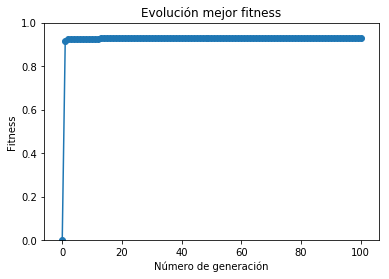

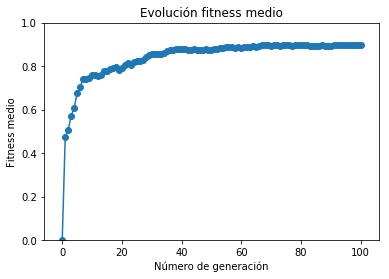

Numero de generaciones:  100 Tamaño de la poblacion:  100 Fitness mejor (% acierto):  0.9314586994727592


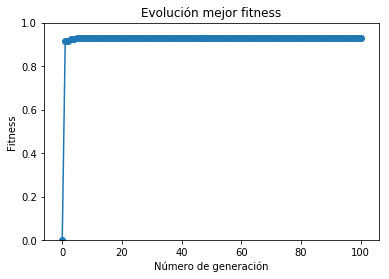

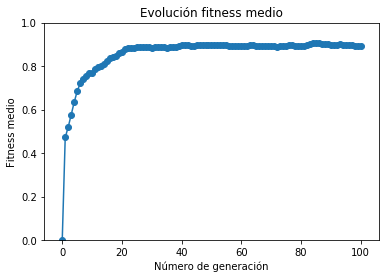

Numero de generaciones:  100 Tamaño de la poblacion:  200 Fitness mejor (% acierto):  0.9314586994727592


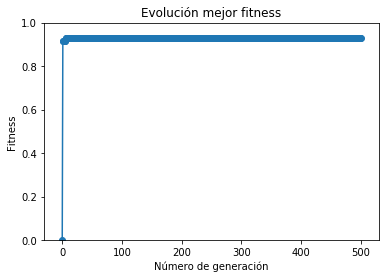

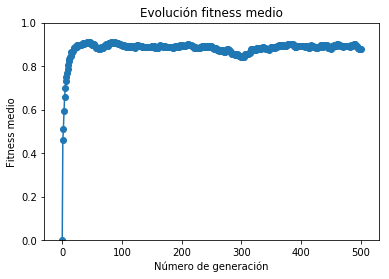

Numero de generaciones:  500 Tamaño de la poblacion:  100 Fitness mejor (% acierto):  0.9314586994727592


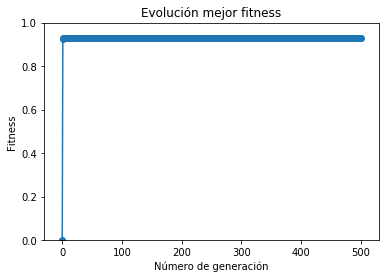

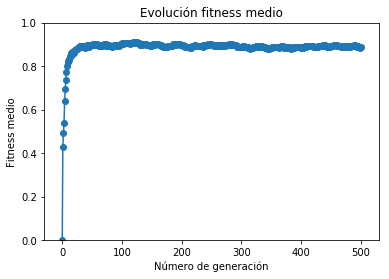

Numero de generaciones:  500 Tamaño de la poblacion:  200 Fitness mejor (% acierto):  0.9314586994727592


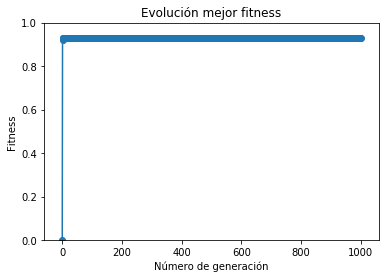

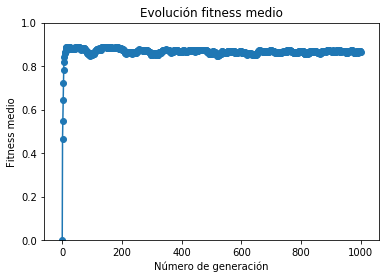

Numero de generaciones:  1000 Tamaño de la poblacion:  100 Fitness mejor (% acierto):  0.9314586994727592


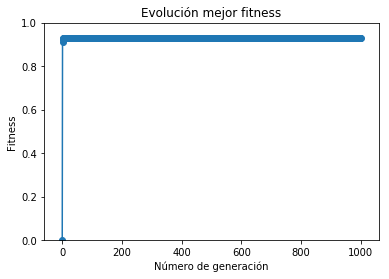

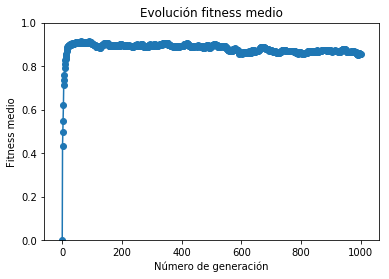

Numero de generaciones:  1000 Tamaño de la poblacion:  200 Fitness mejor (% acierto):  0.9314586994727592


In [152]:
clf = ClasificadorAG(representacion=RepresentacionEntera, n_intervalos=2)


generaciones = [100, 500, 1000]
poblaciones = [100, 200]


# Matriz para guardar las scores obtenidas durante el entrenamiento utilizando validacion simple
scores = np.empty((3,2))

for generacion in generaciones:
    for poblacion in poblaciones:
        
        clf.entrenamiento(wdbc, tam_poblacion=poblacion, n_generaciones=generacion, umbral=.1,
                          pc=.7, pm=.1, elitismo=False, invertir=True, plot=True)
        print("Numero de generaciones: ", generacion, "Tamaño de la poblacion: ", poblacion,
             "Fitness mejor (% acierto): ", clf.champion_fitness)
        plt.show()

## Representación binaria

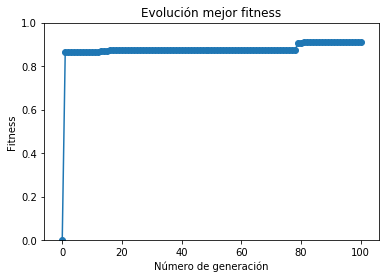

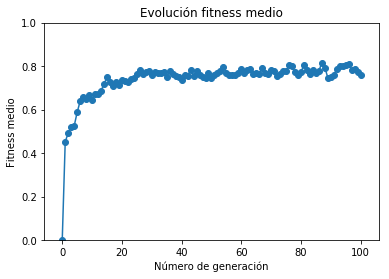

Numero de generaciones:  100 Tamaño de la poblacion:  100 Fitness mejor (% acierto):  0.9121265377855887


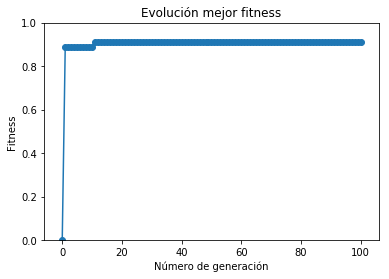

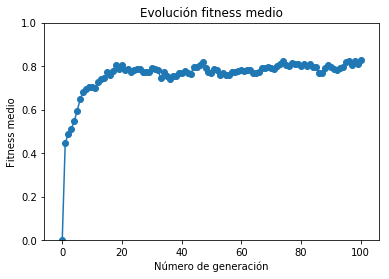

Numero de generaciones:  100 Tamaño de la poblacion:  200 Fitness mejor (% acierto):  0.9121265377855887


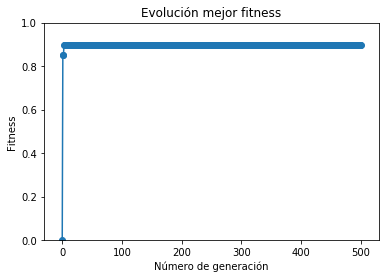

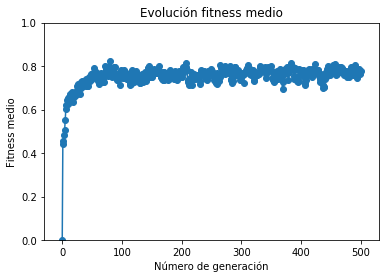

Numero de generaciones:  500 Tamaño de la poblacion:  100 Fitness mejor (% acierto):  0.8998242530755711


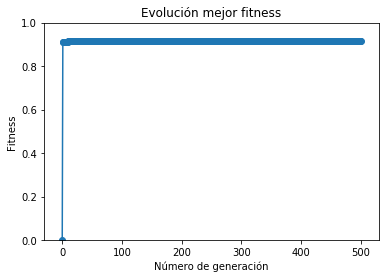

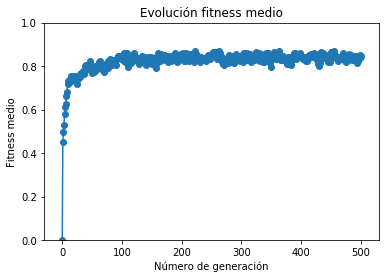

Numero de generaciones:  500 Tamaño de la poblacion:  200 Fitness mejor (% acierto):  0.9156414762741651


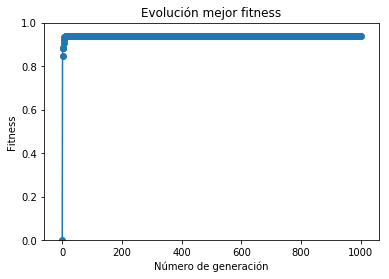

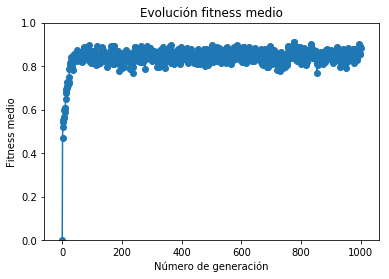

Numero de generaciones:  1000 Tamaño de la poblacion:  100 Fitness mejor (% acierto):  0.9384885764499121


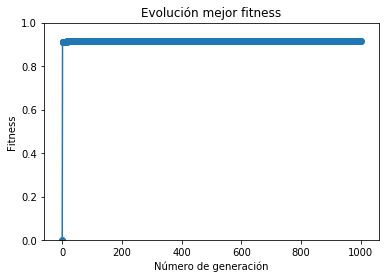

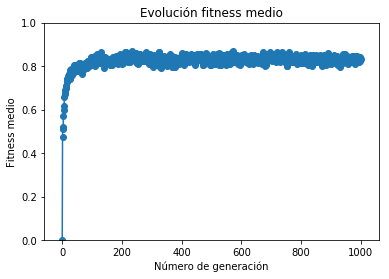

Numero de generaciones:  1000 Tamaño de la poblacion:  200 Fitness mejor (% acierto):  0.9156414762741651


In [155]:
clf = ClasificadorAG(representacion=RepresentacionBinaria, n_intervalos=4)


generaciones = [100, 500, 1000]
poblaciones = [100, 200]


# Matriz para guardar las scores obtenidas durante el entrenamiento utilizando validacion simple
scores = np.empty((3,2))

for generacion in generaciones:
    for poblacion in poblaciones:
        
        clf.entrenamiento(wdbc, tam_poblacion=poblacion, n_generaciones=generacion, umbral=.1,
                          pc=.7, pm=.1, elitismo=False, invertir=True, plot=True)
        print("Numero de generaciones: ", generacion, "Tamaño de la poblacion: ", poblacion,
             "Fitness mejor (% acierto): ", clf.champion_fitness)
        plt.show()